# Library importation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [3]:
df = pd.read_csv("spotify_data.csv")

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
df.shape

(169909, 19)

In [6]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [7]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

## Are there missing values ?

In [8]:
df.isna().any().any()

False

# Data Restructuration

In [9]:
# remove the release_date column because of the inconsistency of its data
# sometimes we have the whole date and other times, it's just the year
# it seems like just keeping the year column is relevant
new_df = df.drop(columns=["release_date"])

In [10]:
new_df.shape

(169909, 18)

# Correlation between columns

In [11]:
# compute the pairwise correlation coefficient between all the columns but name, artists, year, id, key
new_df2 = new_df.drop(columns=["name", "artists", "year", "id", "key"])
new_df2.corr(numeric_only=False)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727
popularity,-0.593345,0.221077,0.063292,0.497488,0.214044,-0.299829,-0.075293,0.466546,-0.032854,1.000000,-0.135707,0.135047,0.009327


From this pairwise correlation, the data below have a "strong" correlation(there, we consider as 
strong correlation a correlation for which Pearson coefficient r is >= 0.5) : 
- acousticness and energy are strongly correlated with r = -0.75
- acousticness is also correlated to loudness with r = -0.56
- acousticness and popularity are correlated with r = -0.59
- danceability is correlated to valence with r = 0.56
- energy is strongly correlated to loudness with r = 0.78

From those observations, some questions pop up :
- will PCA be enough to visualize the underlying structure of those data ? In fact, 8/13 columns are pairwise correlated. And we know that PCA is based on the linear dependence of features. So, is there any linear dependence between all those data ?
- can we use acoustic to predict energy, loudness and/or popularity ?
- can we use danceability to predict valence ?
- can we use energy to predict loudness ?
- can we perform a multiple regression between energy, loudness and acousticness

See you on the next episode(which is the remainder of this project 😉) !!!

# Some visualization

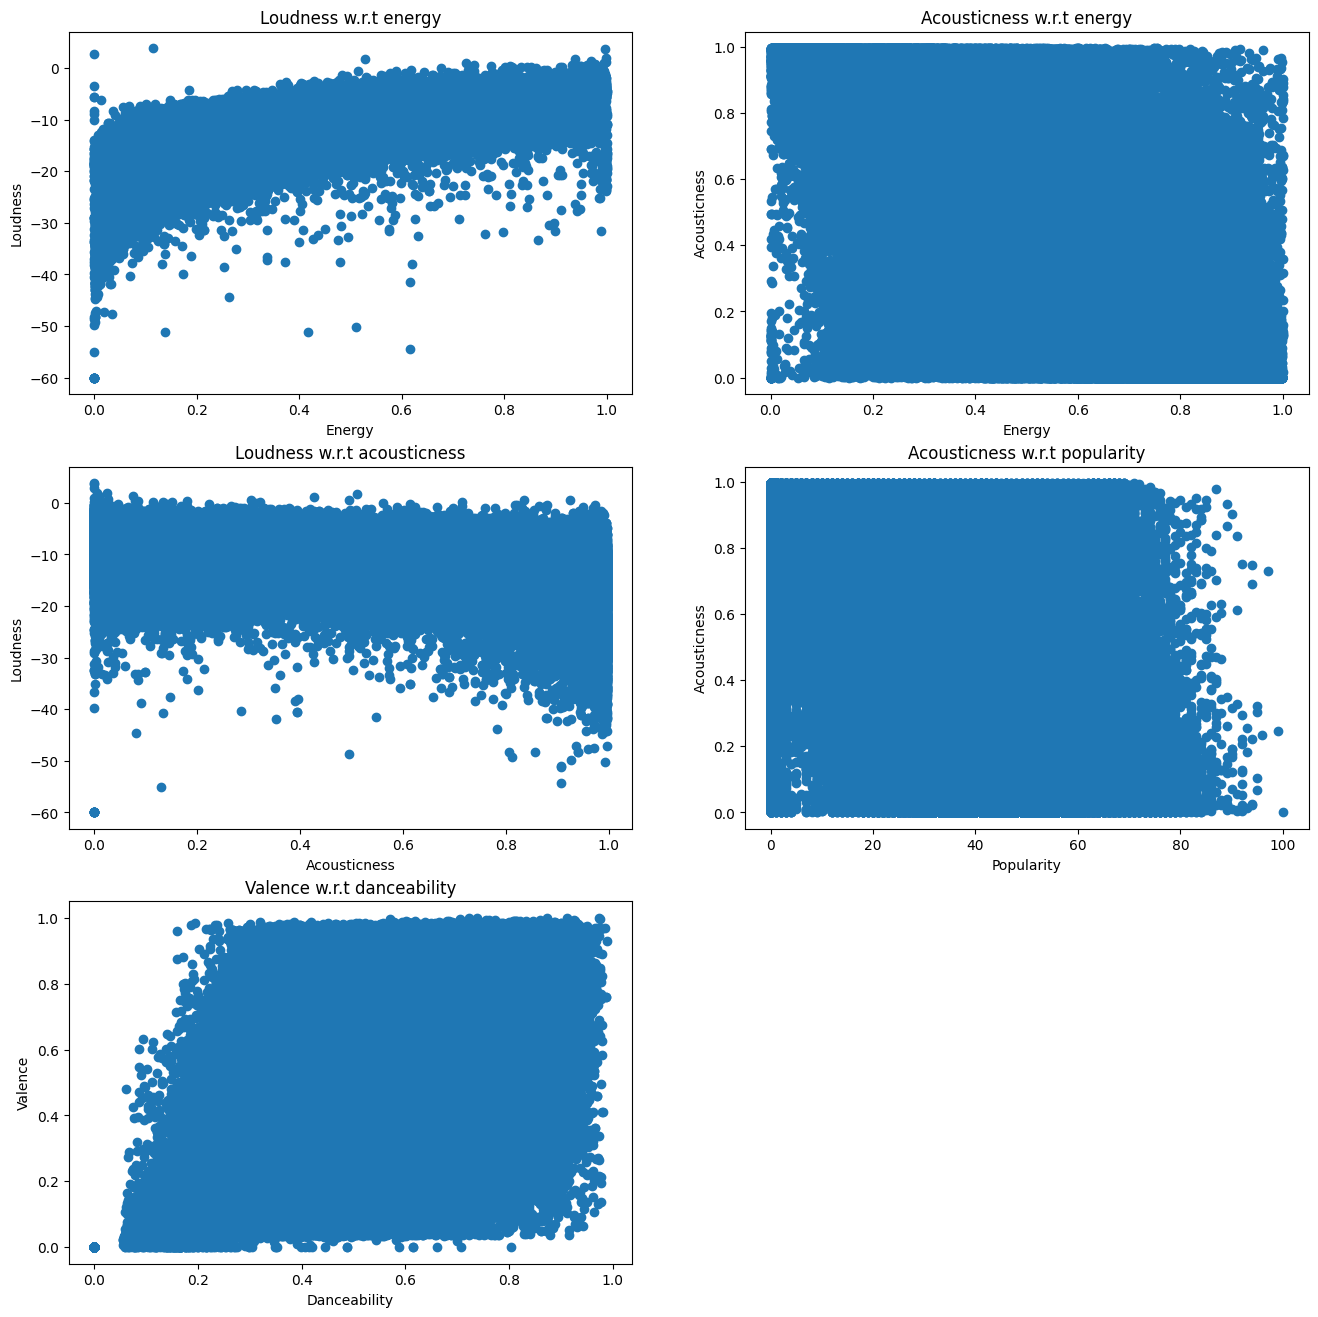

In [12]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(321)
ax.scatter(new_df["energy"], new_df["loudness"])
ax.set_xlabel("Energy")
ax.set_ylabel("Loudness")
ax.set_title("Loudness w.r.t energy")

ax2 = fig.add_subplot(322)
ax2.scatter(new_df["energy"], new_df["acousticness"])
ax2.set_xlabel("Energy")
ax2.set_ylabel("Acousticness")
ax2.set_title("Acousticness w.r.t energy")

ax3 = fig.add_subplot(323)
ax3.scatter(new_df["acousticness"], new_df["loudness"])
ax3.set_xlabel("Acousticness")
ax3.set_ylabel("Loudness")
ax3.set_title("Loudness w.r.t acousticness")

ax4 = fig.add_subplot(324)
ax4.scatter(new_df["popularity"], new_df["acousticness"])
ax4.set_xlabel("Popularity")
ax4.set_ylabel("Acousticness")
ax4.set_title("Acousticness w.r.t popularity")

ax5 = fig.add_subplot(325)
ax5.scatter(new_df["danceability"], new_df["valence"])
ax5.set_xlabel("Danceability")
ax5.set_ylabel("Valence")
ax5.set_title("Valence w.r.t danceability")
plt.show()

# Data Splitting

In order to train and test our models, we decided to split our dataset into train and testing data. Testing data will represent 30% of our dataset

In [13]:
# ***************** splitting ******************
index1 = new_df.index

# get the training data : 70% of the dataset
df_train = new_df.sample(frac=0.7)
index2 = df_train.index

# get the testing data
mask = np.isin(index1, index2, invert=True)
df_test = new_df.iloc[mask]

# reset indexes 
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
1,0.9880,['Carl Woitschach'],0.555,153967,0.4210,0,6OJjveoYwJdIt76y0Pxpxw,0.836000,1,0.1050,-9.878,1,Per aspera ad astra,0,0.0474,123.310,0.8570,1928
2,0.9950,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,0.1270,119.833,0.4930,1928
3,0.8460,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,0.9540,81.249,0.7590,1928
4,0.9940,"['Sergei Rachmaninoff', 'Vladimir Horowitz']",0.376,590293,0.0719,0,6QBInZBkQNIQYU9gGzT5l4,0.883000,10,0.1960,-21.849,0,"Piano Sonata No. 2 in B-Flat Minor, Op. 36: I....",0,0.0352,141.390,0.0393,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50968,0.0220,['Future'],0.854,201907,0.5990,1,05TpY5Fov3Hgfp8V1KILZ8,0.000000,1,0.1730,-7.406,0,Tycoon,66,0.3550,157.031,0.8490,2020
50969,0.0452,['Kelly Clarkson'],0.655,216107,0.7190,0,0o58NWBiVXewJNfNDKQyjw,0.000018,2,0.1090,-7.400,1,I Dare You,69,0.0368,124.034,0.4350,2020
50970,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
50971,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020


# Models

## Some importations

In [14]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures

## Regression Models

### Ridge Linear Regression of loudness

On this part, we're going to build a regressor on the loudness given the energy

#### Training phase

In [15]:
model = Ridge()
energy = np.array(df_train["energy"]).reshape(-1, 1)
loudness = np.array(df_train["loudness"]).reshape(-1,1)
model.fit(energy, loudness)

Ridge()

Residuals = 1482434.1715546963
The coefficient of determination is 0.6116094500294358


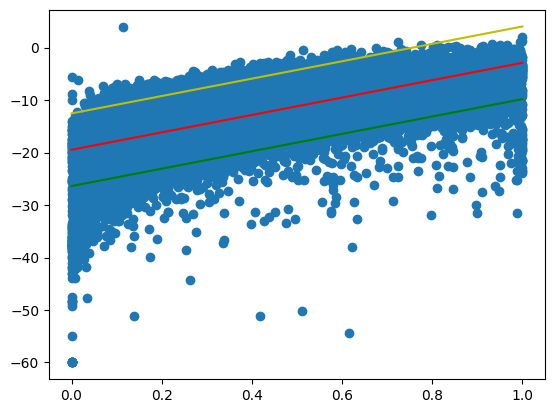

In [16]:
# Prediction on the training data
pred = model.predict(energy)

energy2 = np.asarray(df_train["energy"]).reshape(-1, 1)
stack = np.hstack([energy2, loudness, pred])
sorted_s = stack[np.argsort(stack[:,0])]
energy2, loudness_init, pred = np.hsplit(sorted_s, 3)

# Get the residuals
res = np.sum((pred-loudness_init)**2)
print(f"Residuals = {res}")

# Get the coefficient of determination
coef = model.score(energy2, loudness_init)
print(f"The coefficient of determination is {coef}")

# Build a 95% confidence interval
std = np.sqrt((1/(len(loudness_init)-2))*res)
interval = (std * 1.96)
low, up = pred - interval, pred + interval

# Plot the data and the model
plt.scatter(df_train["energy"], df_train["loudness"])
plt.plot(energy2, low, c="g")
plt.plot(energy2, pred, c="r")
plt.plot(energy2, up, c="y")
plt.show()

In [17]:
print(model.coef_)

[[16.56710794]]


Observation :
We only have a score of 61,33% on training data. So, predict loudness with energy may not be enough

#### Testing step

In [18]:
pred2 = model.predict(np.array(df_test["energy"]).reshape(-1,1))

score = model.score(np.array(df_test["energy"]).reshape(-1,1), np.array(df_test["loudness"]).reshape(-1,1))

print(f"Score = {score}")

Score = 0.6164242785783218


The score in testing data is a bit greater than the score in the training data. 
Maybe a polynomial regression will be better

#### Ridge Multiple linear regression on loudness

Score = <bound method RegressorMixin.score of Ridge()>
Ridge with degree = 1


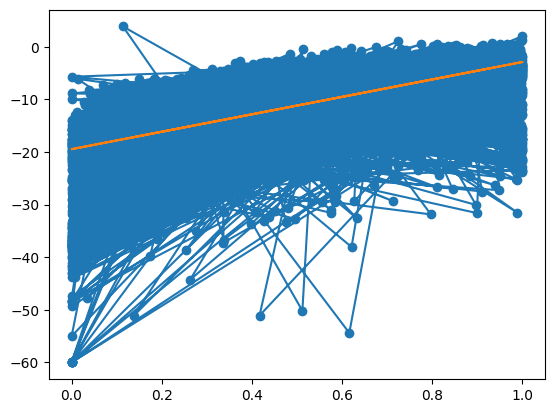

Score = <bound method RegressorMixin.score of Ridge()>
Ridge with degree = 2


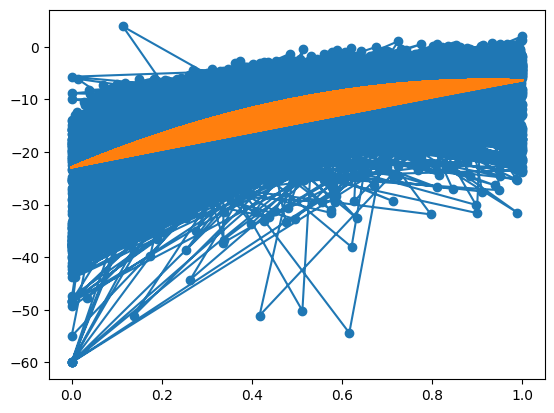

Score = <bound method RegressorMixin.score of Ridge()>
Ridge with degree = 3


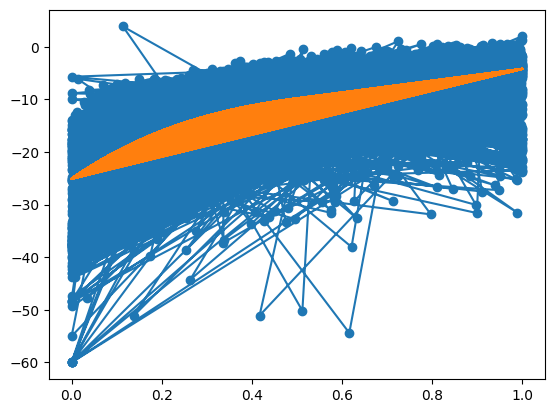

Score = <bound method RegressorMixin.score of Ridge()>
Ridge with degree = 6


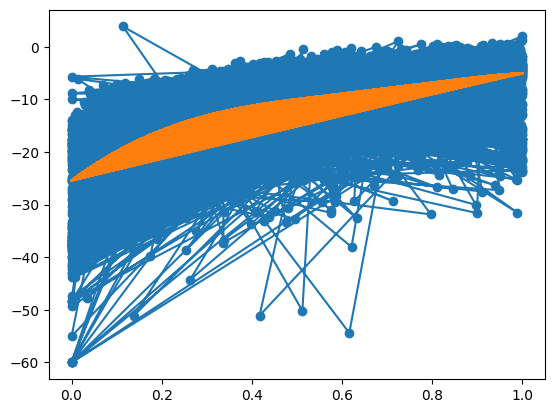

Score = <bound method RegressorMixin.score of Ridge()>
Ridge with degree = 9


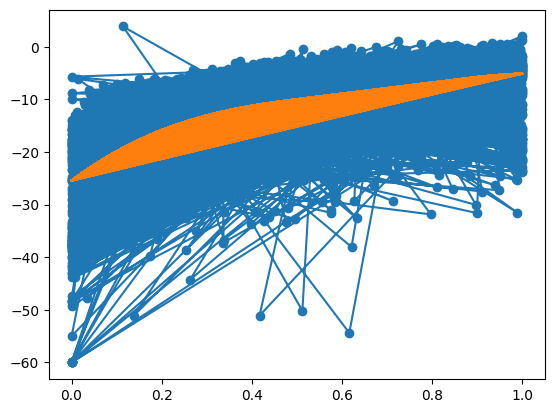

Score = <bound method RegressorMixin.score of Ridge()>
Ridge with degree = 12


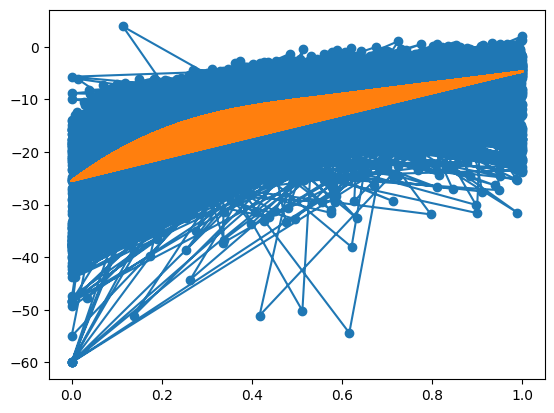

In [19]:
for deg in [1,2,3,6,9,12]:
    energy_deg = PolynomialFeatures(degree=deg).fit_transform(energy)[:,1:]
    model = Ridge()
    model.fit(energy_deg, loudness)
    
    # train the regressor on training set
    pred = model.predict(energy_deg)
    
    print(f"Score = {model.score()}")
    
    # plot
    print(f"Ridge with degree = {deg}")
    plt.scatter(df_train["energy"], df_train["loudness"])
    plt.plot(energy, pred)
    plt.show()